In [50]:
import pandas as pd

In [51]:
df=pd.read_excel('/content/heart_disease.xlsx',sheet_name='Heart_disease')

In [52]:
df.shape

(908, 13)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [54]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [55]:
#checking for null values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [56]:
#handling missing values
df['oldpeak'].fillna(df['oldpeak'].mean(),inplace=True)

In [57]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.055826,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


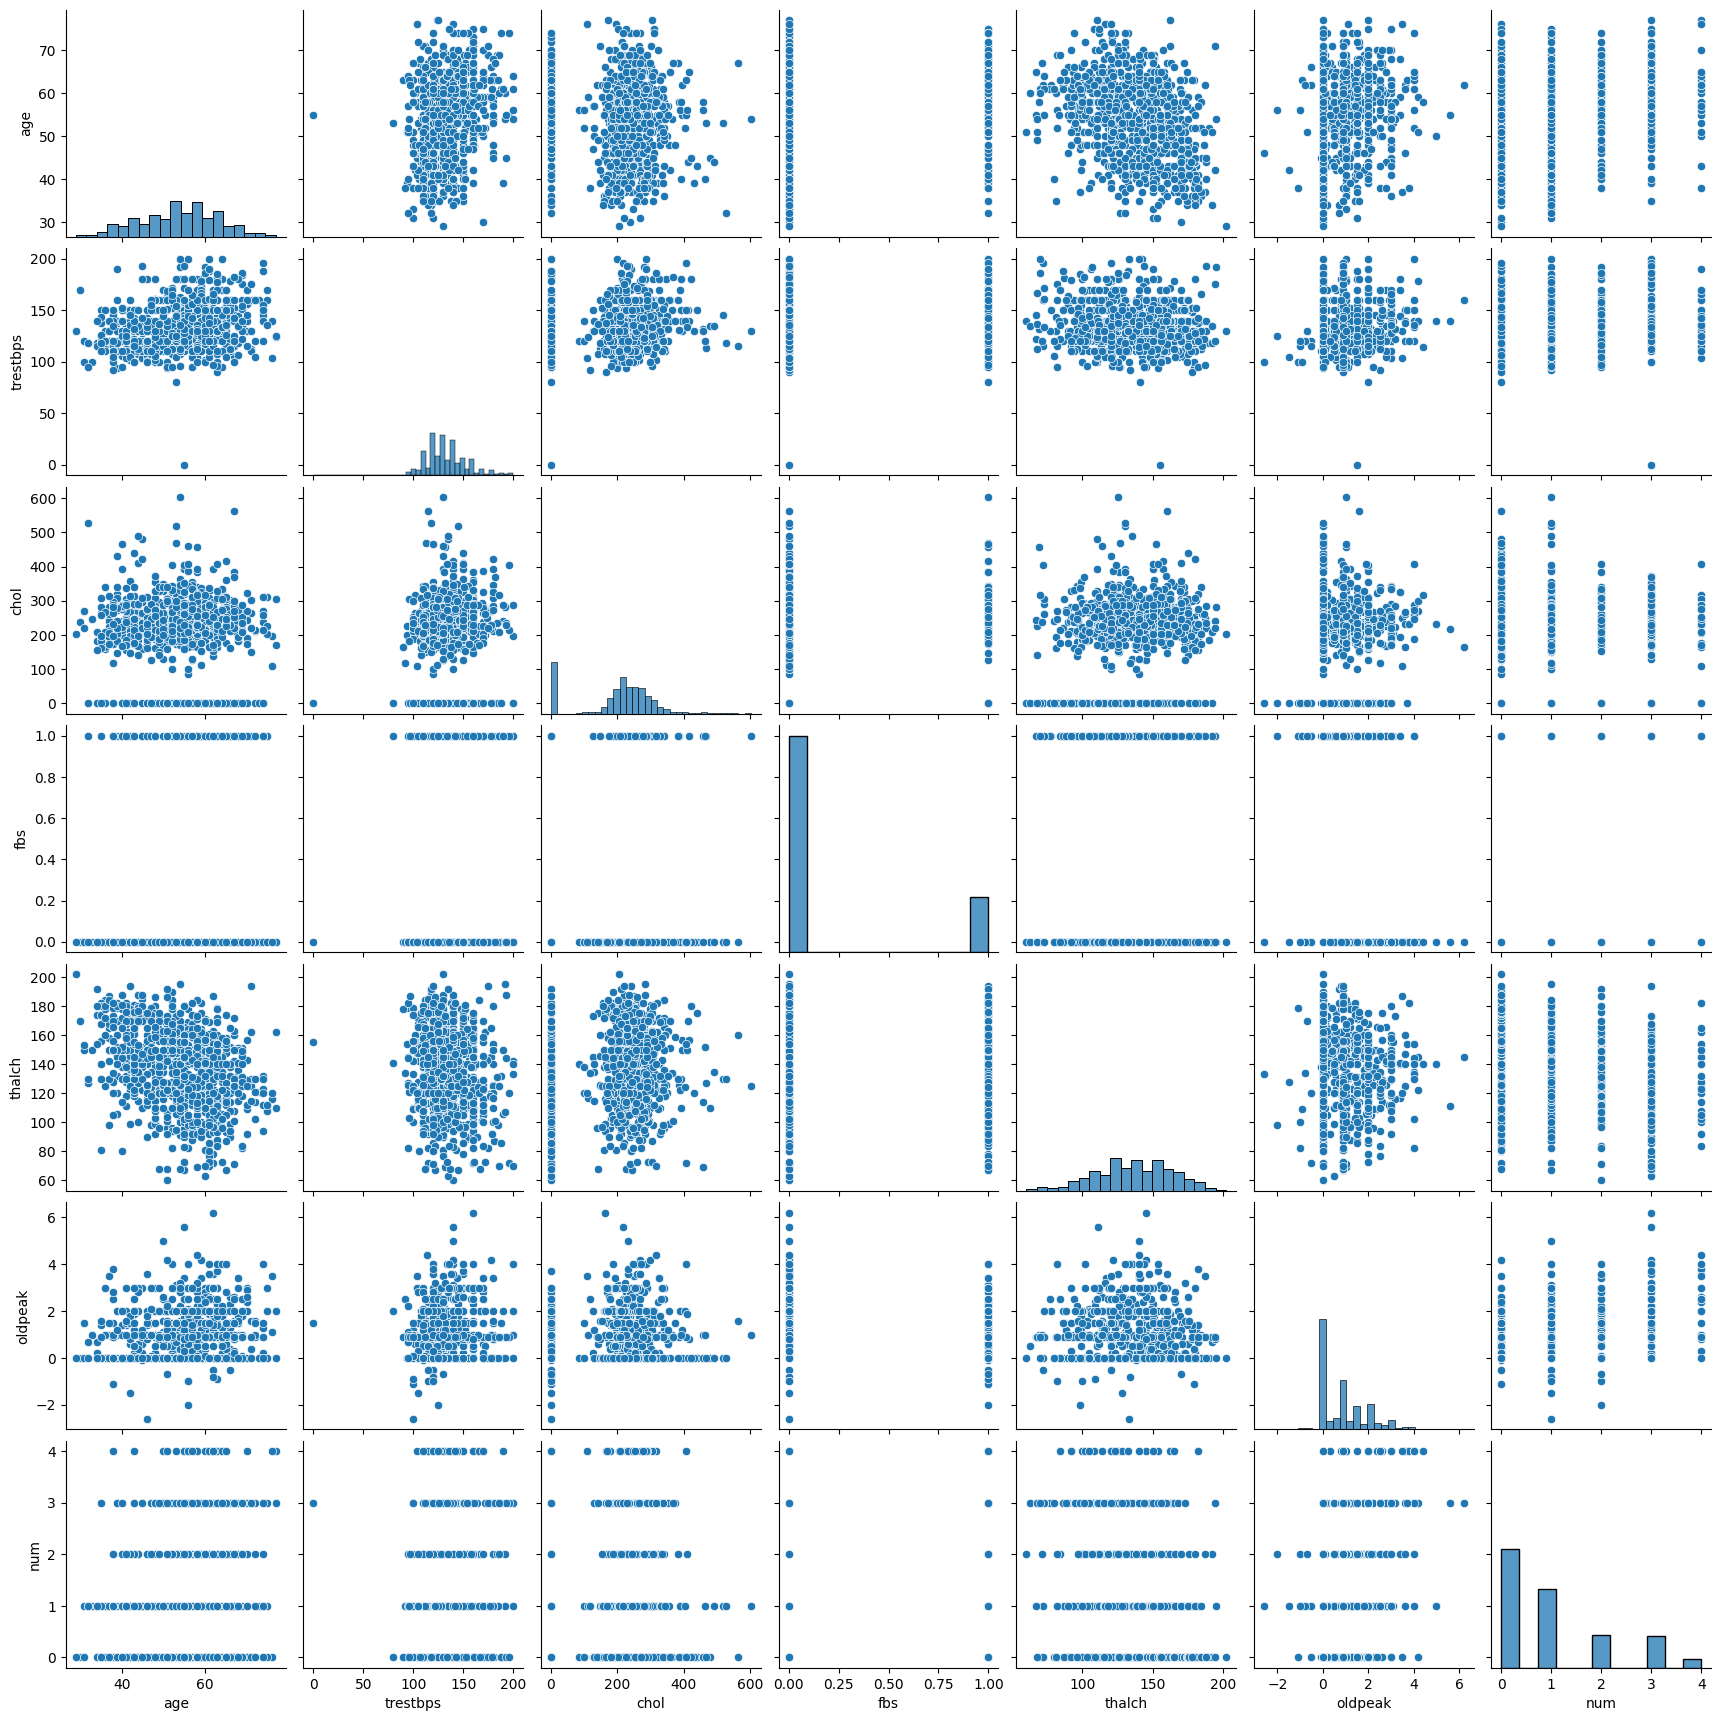

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()



In [59]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [60]:
# Identify categorical and numerical columns

# Convert categorical columns to string type to avoid mixed types
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols:
    df[col] = df[col].astype(str)

numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

In [61]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#encoding categorical data and scaling numnerical data

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

In [62]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Split the dataset into training and testing sets (80-20 split)
X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(random_state=42))])

clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predict and evaluate the model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("ROC-AUC:", roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'))

Accuracy: 0.4835164835164835
Precision: 0.30505599472990774
Recall: 0.30918529311622506
F1 Score: 0.3051506661894856
ROC-AUC: 0.5784664957870412


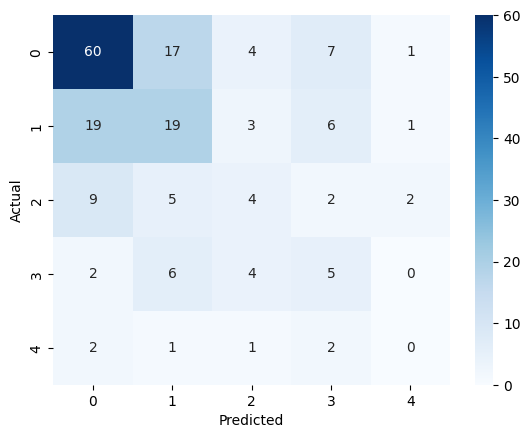

In [65]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [66]:
# Hyperparameter Tuning
# Define the parameter grid
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ['gini', 'entropy']
}

In [67]:
from sklearn.model_selection import GridSearchCV
# Grid search
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'thalch',
                                                                          'oldpeak']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['sex',
                                                                          'cp',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'exang',
                                                                          'slope',
                                                                          'thal'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [3, 5, 7, 10, None],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [68]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__min_samples_split': 2}
Best Score: 0.5551251771374586


In [69]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Precision:", precision_score(y_test, y_pred_best, average='macro'))
print("Best Model Recall:", recall_score(y_test, y_pred_best, average='macro'))
print("Best Model F1 Score:", f1_score(y_test, y_pred_best, average='macro'))
print("Best Model ROC-AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr'))


Best Model Accuracy: 0.5659340659340659
Best Model Precision: 0.26341923912017373
Best Model Recall: 0.30040207094073584
Best Model F1 Score: 0.27505852543446524
Best Model ROC-AUC: 0.6668723842400021


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


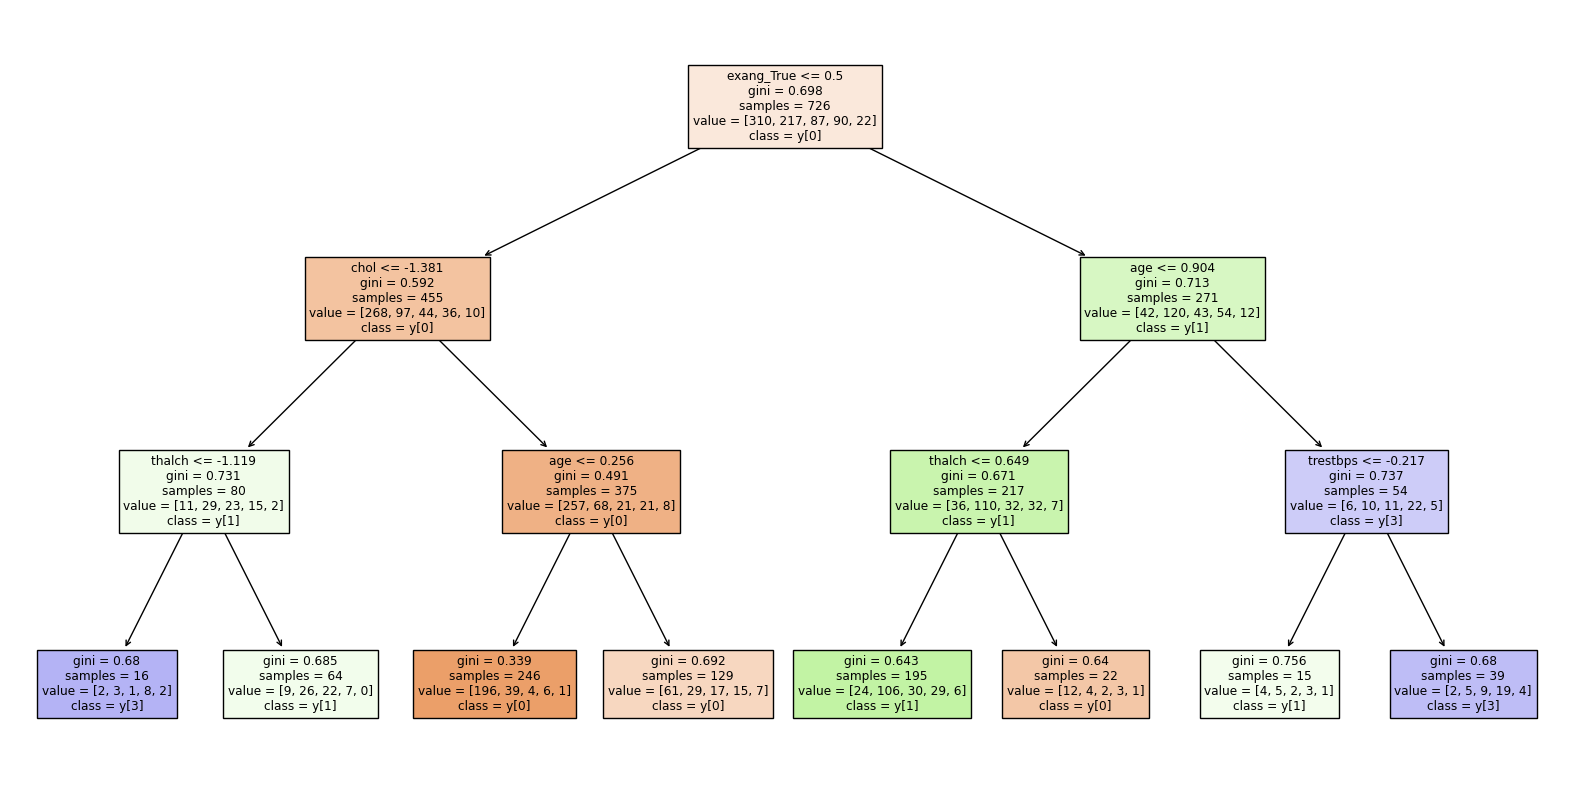

In [70]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model.named_steps['classifier'], feature_names=numerical_cols + list(best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)), class_names=True, filled=True)
plt.show()

1.What are some common hyperparameters of decision tree models, and how do they affect the model's performance?


1.Max Depth: Controls the maximum depth of the tree. A shallow tree may underfit the data, while a deep tree may overfit.

2.Min Samples Split: Minimum number of samples required to split an internal node. Higher values prevent overfitting by making the model more general.

3.Criterion: Function to measure the quality of a split ("gini" for Gini impurity or "entropy" for Information Gain). Different criteria can lead to different splits in the tree.

4.Min Samples Leaf: Minimum number of samples required to be at a leaf node. Prevents overfitting by enforcing a minimum number of samples in terminal nodes.



2.What is the difference between the Label encoding and One-hot encoding?

Label Encoding: Converts categorical values into integer values. It may introduce ordinal relationships where none exist, potentially misleading the model.

One-Hot Encoding: Converts categorical values into binary vectors. It avoids ordinal relationships but increases dimensionality, which can be computationally expensive.
